In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [3]:
#Quais as dimensões do dataframe?
df.shape

(29170, 9)

In [4]:
#Qual o tipo das variáveis?
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

In [5]:
#Existem variáveis faltantes no dataset? Quais?
df.isnull().sum()
#colunas idade, nome, divida

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [6]:
#Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?
df.estado_civil.value_counts()

Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [7]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

In [8]:
df.cor.value_counts()

White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

In [9]:
#Faça um tratamento nas variáveis faltantes.
#Apaguei as colunas['nome', 'dívida'] 
df.drop(['nome', 'dívida'], axis=1, inplace=True)

In [10]:
#Preenchi a coluna idade com a media
media = df.idade.mean()
df.idade.fillna(media, inplace=True)

In [11]:
df.isnull().sum()

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64

In [12]:
#Aplique uma transformação "MinMax" na variável 'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [14]:
X = df.horas_por_semana.values.reshape(-1,1)
X

array([[40],
       [13],
       [40],
       ...,
       [40],
       [20],
       [40]], dtype=int64)

In [15]:
mm_scaler.fit(X)

MinMaxScaler()

In [16]:
ss_scaler.fit(X)

StandardScaler()

In [17]:
mm_scaler.transform(X)

array([[0.39795918],
       [0.12244898],
       [0.39795918],
       ...,
       [0.39795918],
       [0.19387755],
       [0.39795918]])

In [18]:
ss_scaler.transform(X)

array([[-0.03605983],
       [-2.21049975],
       [-0.03605983],
       ...,
       [-0.03605983],
       [-1.64675606],
       [-0.03605983]])

count    29170.000000
mean        40.447755
std         12.417203
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: horas_por_semana, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

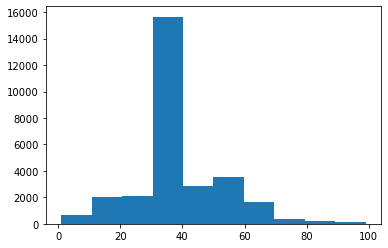

In [19]:
print(df.horas_por_semana.describe())

plt.hist(df.horas_por_semana)
plt.show

In [20]:
df_novo = pd.DataFrame(np.c_[df, mm_scaler.transform(X), ss_scaler.transform(X)]).round(4)

df_novo.rename(columns={0:'Idade',1:'Tempo_Educação',2:'Estado_Civil',3:'Cor',4:'Sexo',5:'Horas_por_Semana',6:'Salario_Anual',7:'Mm_scaler',8:'Ss_scaler'}, inplace=True)

Informações ~ Idade (MinMax):



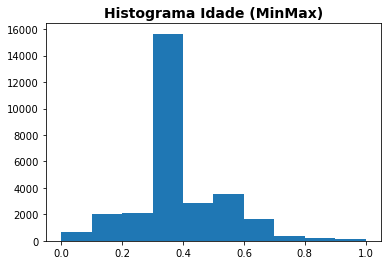

In [21]:
print("Informações ~ Idade (MinMax):\n")
#print(mm_scaler.transform(X).describe())

plt.title("Histograma Idade (MinMax)", fontsize = 14, fontweight = 'bold')
plt.hist(mm_scaler.transform(X))
plt.show()

In [22]:
print(df.shape, df_novo.shape)

(29170, 7) (29170, 9)


count     29170.00000
unique       94.00000
top          -0.03606
freq      13418.00000
Name: Ss_scaler, dtype: float64


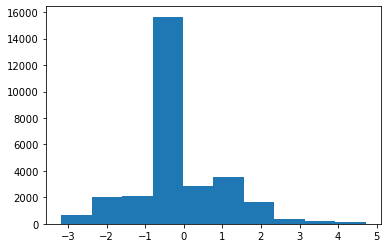

In [23]:
print(df_novo.Ss_scaler.describe())

plt.hist(df_novo.Ss_scaler)
plt.show()

Informações ~ Idade (StandartScaler):



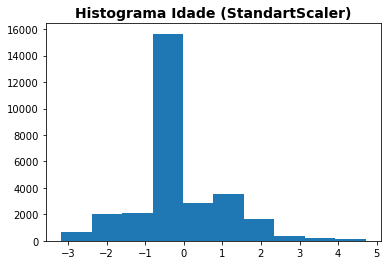

In [24]:
print("Informações ~ Idade (StandartScaler):\n")
#print(mm_scaler.transform(X).describe())

plt.title("Histograma Idade (StandartScaler)", fontsize = 14, fontweight = 'bold')
plt.hist(ss_scaler.transform(X))
plt.show()

In [25]:
#Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.
from sklearn.preprocessing import OneHotEncoder

In [26]:
print('estado civil')
print(df.estado_civil.value_counts())
print('___________________')
print('cor')
print(df.cor.value_counts())
print('___________________')
print('sexo')
print(df.sexo.value_counts())
print('___________________')

estado civil
Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64
___________________
cor
White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64
___________________
sexo
Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64
___________________


In [27]:
ohe = OneHotEncoder()

In [28]:
estado_civil = df.estado_civil.values.reshape(-1,1)

ohe.fit(estado_civil)

OneHotEncoder()

In [29]:
ohe.transform(estado_civil)

<29170x7 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [30]:
ohe.transform(estado_civil).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [31]:
ohe.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [32]:
df_est_civil= pd.DataFrame(ohe.transform(estado_civil).toarray(), 
                             columns = ohe.categories_[0].tolist())

In [33]:
cor = df.cor.values.reshape(-1,1)

ohe.fit(cor)

OneHotEncoder()

In [34]:
ohe.transform(cor)

<29170x5 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [35]:
ohe.transform(cor).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [36]:
ohe.categories_

[array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

In [37]:
df_cor= pd.DataFrame(ohe.transform(cor).toarray(), 
                             columns = ohe.categories_[0].tolist())

In [38]:
ohe = OneHotEncoder()

sexo = df.sexo.values.reshape(-1,1)

ohe.fit(sexo)

OneHotEncoder()

In [39]:
ohe.transform(sexo)

<29170x3 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [40]:
ohe.transform(sexo).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [41]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

In [42]:
ohe.categories_

[array(['?', 'Female', 'Male'], dtype=object)]

In [43]:
df_sexo= pd.DataFrame(ohe.transform(sexo).toarray(), 
                             columns = ohe.categories_[0].tolist())

df_sexo

,?,Female,Male
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
29165,0.0,1.0,0.0
29166,0.0,0.0,1.0
29167,0.0,1.0,0.0
29168,0.0,0.0,1.0


In [44]:
df_novo = pd.concat([df, df_est_civil, df_sexo, df_cor], axis = 1)
df_novo.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
df_novo.drop(['estado_civil', 'cor','sexo'], axis=1, inplace=True)
df_novo.head()

,idade,tempo_educacao,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39.0,13,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,50.0,13,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,38.0,9,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,53.0,7,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,37.0,14,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df_novo.columns

Index(['idade', 'tempo_educacao', 'horas_por_semana', 'salario_anual',
       'Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed', '?',
       'Female', 'Male', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black',
       'Other', 'White'],
      dtype='object')

<AxesSubplot:>

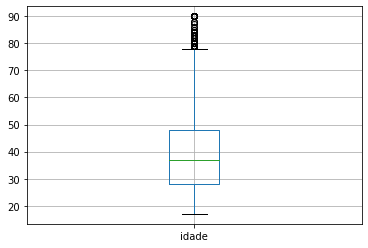

In [47]:
#Detecte e elimine os outliers da variável 'idade'.

df_novo.boxplot('idade')

In [48]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [49]:
df_novo['outlier_idade'] = detecta_outlier(df_novo.idade)

In [50]:
df_novo

,idade,tempo_educacao,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,outlier_idade
0,39.0,13,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,50.0,13,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,38.0,9,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,53.0,7,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,37.0,14,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,38,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
29166,40.0,9,40,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
29167,58.0,9,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
29168,22.0,9,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [51]:
df_novo.loc[(df_novo.outlier_idade ==1)]

,idade,tempo_educacao,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,outlier_idade
61,79.0,10,20,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
193,90.0,9,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
380,80.0,9,24,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
826,81.0,9,30,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
936,90.0,9,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28517,80.0,12,4,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
28535,82.0,9,20,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
28920,90.0,9,25,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
28996,90.0,4,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [52]:
#Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.


In [53]:
df_novo.head()

,idade,tempo_educacao,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,outlier_idade
0,39.0,13,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,50.0,13,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,38.0,9,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,53.0,7,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,37.0,14,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [70]:
#10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, 
#após todas as transformações dos itens acima.



def preprocessamento(df, cols_numericas, cols_categoricas):
    
    from pandas import Series
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    ohe = OneHotEncoder
    mm_scaler = MinMaxScaler()
    ss_scaler = StandardScaler()
    
    dff = df.copy()
    temp = (df.isnull().sum() / df.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes:
        dff = dff.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
        
    for v in cols_numericas:
        dff[v] = dff[v].fillna(dff[v].mean())
        
    for v in cols_categoricas:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
                  
    return dff

In [71]:
df_limpo = preprocessamento(df = df, 
                            cols_numericas = ['idade', 'tempo_educacao', 'horas_por_semana', 'horas_por_semana'], 
                            cols_categoricas = ['estado_civil', 'cor', 'sexo'])
    
df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [72]:
df_limpo.isnull().sum()

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64